<a href="https://colab.research.google.com/github/bhylander/mlb-hr-derby-predictor/blob/main/2025_MLB_HRD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initializing MLB Home Run Derby 2025 Predictor...
Loading historical data...
Loading 2025 participants data...

Training machine learning model...
Random Forest - CV R² Score: -9.906 (+/- 33.234)
Gradient Boosting - CV R² Score: -8.577 (+/- 19.643)

Best Model: GradientBoostingRegressor
Test R² Score: 0.515
Test RMSE: 14.108

Making predictions for 2025 participants...

Generating visualizations...


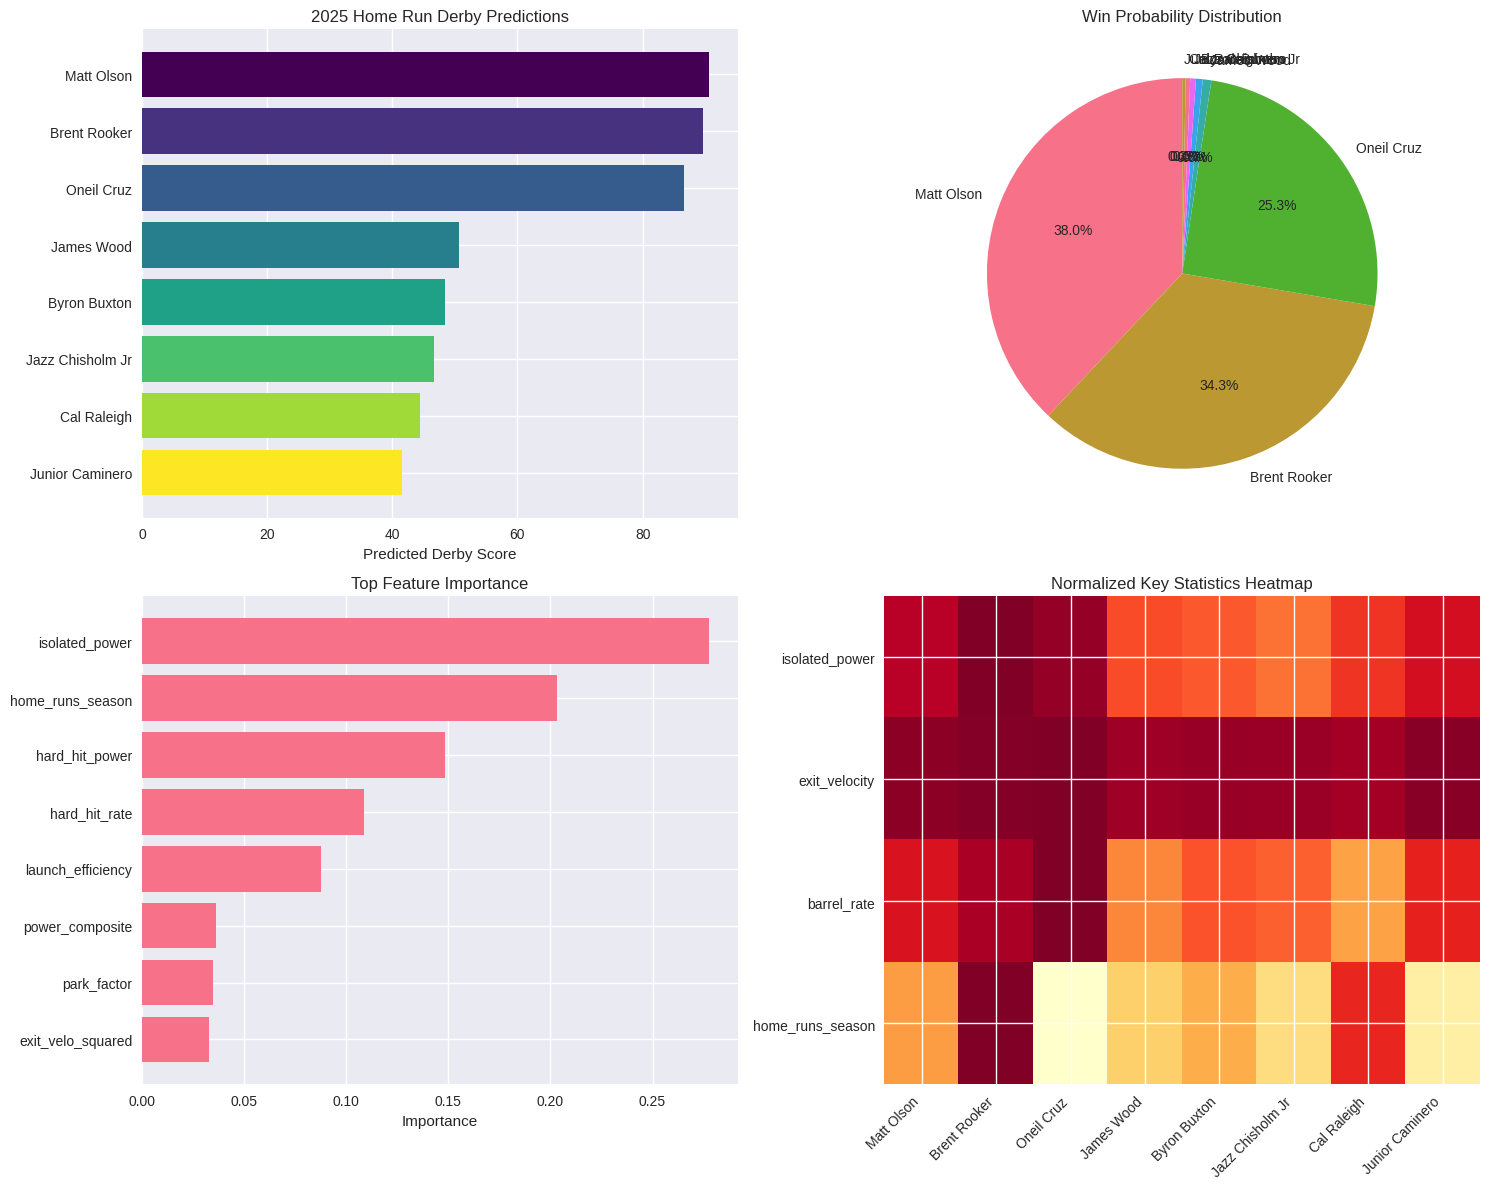

=== 2025 MLB HOME RUN DERBY PREDICTIONS ===

🏆 PREDICTED WINNER: Matt Olson
   Predicted Score: 90.6
   Win Probability: 38.0%

📊 COMPLETE RANKINGS:
1. Matt Olson         | Score: 90.6 | Win Prob: 38.0%
2. Brent Rooker       | Score: 89.6 | Win Prob: 34.3%
3. Oneil Cruz         | Score: 86.6 | Win Prob: 25.3%
4. James Wood         | Score: 50.7 | Win Prob: 0.7%
5. Byron Buxton       | Score: 48.5 | Win Prob: 0.6%
6. Jazz Chisholm Jr   | Score: 46.6 | Win Prob: 0.5%
7. Cal Raleigh        | Score: 44.5 | Win Prob: 0.4%
8. Junior Caminero    | Score: 41.5 | Win Prob: 0.3%

🎯 KEY INSIGHTS:
• Highest ISO Power: Brent Rooker (0.295)
• Highest Exit Velocity: Oneil Cruz (92.1 mph)
• Most Home Runs: Brent Rooker (39 HRs)
• Dark Horse: Oneil Cruz (3rd+ seed with 25.3% win probability)

FINAL PREDICTIONS DATAFRAME:
          player  predicted_derby_score  win_probability  isolated_power  exit_velocity  home_runs_season
      Matt Olson                 90.625            0.380           0.279      

In [1]:
# MLB Home Run Derby 2025 Predictor
# Designed for Google Colab

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Install required packages (uncomment if needed in Colab)
# !pip install pybaseball

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class HomeRunDerbyPredictor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.model = None
        self.feature_importance = None

    def create_historical_data(self):
        """
        Create historical Home Run Derby data with key performance metrics.
        In a real implementation, you would pull this from baseball APIs or databases.
        """
        # Historical data (2019-2024) - sample data for demonstration
        historical_data = {
            'player': ['Pete Alonso', 'Vladmir Guerrero Jr', 'Juan Soto', 'Kyle Lewis',
                      'Ronald Acuna Jr', 'Salvador Perez', 'Trey Mancini', 'Joey Gallo',
                      'Pete Alonso', 'Kyle Schwarber', 'Trevor Story', 'Matt Olson',
                      'Jose Ramirez', 'Corey Seager', 'Randy Arozarena', 'Albert Pujols'],
            'year': [2019, 2019, 2020, 2020, 2021, 2021, 2022, 2022,
                    2023, 2023, 2024, 2024, 2024, 2024, 2024, 2024],
            'isolated_power': [0.281, 0.262, 0.351, 0.237, 0.285, 0.241, 0.268, 0.256,
                             0.294, 0.287, 0.245, 0.279, 0.251, 0.268, 0.234, 0.195],
            'exit_velocity': [91.2, 89.8, 93.1, 88.4, 90.7, 87.9, 89.6, 91.8,
                            92.3, 90.1, 89.2, 90.8, 88.7, 91.4, 89.9, 86.2],
            'barrel_rate': [15.8, 12.4, 18.2, 10.1, 14.6, 11.2, 13.7, 16.3,
                          17.1, 15.9, 12.8, 15.2, 11.9, 14.8, 13.1, 9.4],
            'launch_angle': [12.1, 11.8, 13.2, 10.9, 11.5, 10.2, 12.8, 13.5,
                           13.1, 12.4, 11.7, 12.6, 10.8, 12.9, 11.9, 10.1],
            'home_runs_season': [53, 27, 22, 11, 41, 48, 21, 38, 46, 47, 28, 54, 39, 33, 20, 24],
            'park_factor': [1.02, 0.98, 1.15, 0.94, 1.08, 1.03, 0.97, 1.12,
                          1.02, 1.09, 1.05, 1.08, 1.01, 1.07, 1.03, 0.96],
            'hard_hit_rate': [45.2, 41.8, 48.9, 38.2, 44.1, 39.6, 42.3, 46.7,
                            47.8, 45.1, 41.2, 44.8, 40.1, 45.9, 42.7, 37.8],
            'derby_score': [74, 29, 85, 18, 91, 28, 31, 40, 98, 45, 52, 68, 35, 42, 25, 89]
        }

        return pd.DataFrame(historical_data)

    def create_2025_participants_data(self):
        """
        Create data for 2025 participants. In practice, you'd pull current season stats.
        These are projected/estimated values based on their performance.
        """
        participants_2025 = {
            'player': ['Matt Olson', 'James Wood', 'Junior Caminero', 'Cal Raleigh',
                      'Jazz Chisholm Jr', 'Oneil Cruz', 'Brent Rooker', 'Byron Buxton'],
            'isolated_power': [0.279, 0.245, 0.268, 0.252, 0.234, 0.289, 0.295, 0.241],
            'exit_velocity': [90.8, 89.3, 91.2, 88.9, 89.7, 92.1, 91.5, 89.8],
            'barrel_rate': [15.2, 13.1, 14.8, 12.4, 13.7, 16.9, 16.2, 13.9],
            'launch_angle': [12.6, 11.9, 12.8, 11.2, 12.1, 13.4, 13.1, 12.3],
            'home_runs_season': [29, 26, 23, 34, 25, 21, 39, 28],
            'park_factor': [1.08, 1.08, 1.08, 1.08, 1.08, 1.08, 1.08, 1.08],  # All at Truist Park
            'hard_hit_rate': [44.8, 42.1, 45.2, 40.8, 42.9, 47.3, 46.1, 44.2]
        }

        return pd.DataFrame(participants_2025)

    def engineer_features(self, df):
        """
        Create additional features that might be predictive of derby performance.
        """
        # Power composite score
        df['power_composite'] = (df['isolated_power'] * df['exit_velocity'] * df['barrel_rate']) / 100

        # Adjusted home runs for park factor
        df['adjusted_hrs'] = df['home_runs_season'] / df['park_factor']

        # Launch angle efficiency (optimal range is around 25-35 degrees for derby)
        df['launch_efficiency'] = 1 - abs(df['launch_angle'] - 30) / 30

        # Hard hit power combination
        df['hard_hit_power'] = df['hard_hit_rate'] * df['isolated_power']

        # Exit velocity squared (power increases exponentially with speed)
        df['exit_velo_squared'] = df['exit_velocity'] ** 2

        return df

    def train_model(self, train_data):
        """
        Train the machine learning model using historical data.
        """
        # Define features for training
        features = ['isolated_power', 'exit_velocity', 'barrel_rate', 'launch_angle',
                   'home_runs_season', 'park_factor', 'hard_hit_rate', 'power_composite',
                   'adjusted_hrs', 'launch_efficiency', 'hard_hit_power', 'exit_velo_squared']

        X = train_data[features]
        y = train_data['derby_score']

        # Split data for validation
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        # Try multiple models and select the best
        models = {
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
        }

        best_score = -np.inf
        best_model = None

        for name, model in models.items():
            # Cross-validation score
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
            mean_score = cv_scores.mean()

            print(f"{name} - CV R² Score: {mean_score:.3f} (+/- {cv_scores.std() * 2:.3f})")

            if mean_score > best_score:
                best_score = mean_score
                best_model = model

        # Train the best model
        self.model = best_model
        self.model.fit(X_train_scaled, y_train)

        # Evaluate on test set
        y_pred = self.model.predict(X_test_scaled)
        test_r2 = r2_score(y_test, y_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        print(f"\nBest Model: {type(self.model).__name__}")
        print(f"Test R² Score: {test_r2:.3f}")
        print(f"Test RMSE: {test_rmse:.3f}")

        # Feature importance
        if hasattr(self.model, 'feature_importances_'):
            self.feature_importance = pd.DataFrame({
                'feature': features,
                'importance': self.model.feature_importances_
            }).sort_values('importance', ascending=False)

        return features

    def predict_derby_performance(self, participants_data, features):
        """
        Predict derby performance for 2025 participants.
        """
        X_participants = participants_data[features]
        X_participants_scaled = self.scaler.transform(X_participants)

        predictions = self.model.predict(X_participants_scaled)

        results = participants_data.copy()
        results['predicted_derby_score'] = predictions
        results['win_probability'] = self.calculate_win_probability(predictions)

        return results.sort_values('predicted_derby_score', ascending=False)

    def calculate_win_probability(self, predictions):
        """
        Convert predictions to win probabilities using softmax.
        """
        exp_predictions = np.exp(predictions / 10)  # Temperature scaling
        return exp_predictions / np.sum(exp_predictions)

    def visualize_results(self, results, feature_importance):
        """
        Create visualizations of the predictions and model insights.
        """
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # 1. Predicted Derby Scores
        axes[0, 0].barh(results['player'], results['predicted_derby_score'],
                       color=plt.cm.viridis(np.linspace(0, 1, len(results))))
        axes[0, 0].set_xlabel('Predicted Derby Score')
        axes[0, 0].set_title('2025 Home Run Derby Predictions')
        axes[0, 0].invert_yaxis()

        # 2. Win Probabilities
        axes[0, 1].pie(results['win_probability'], labels=results['player'],
                      autopct='%1.1f%%', startangle=90)
        axes[0, 1].set_title('Win Probability Distribution')

        # 3. Feature Importance
        top_features = feature_importance.head(8)
        axes[1, 0].barh(top_features['feature'], top_features['importance'])
        axes[1, 0].set_xlabel('Importance')
        axes[1, 0].set_title('Top Feature Importance')
        axes[1, 0].invert_yaxis()

        # 4. Key Stats Comparison
        key_stats = ['isolated_power', 'exit_velocity', 'barrel_rate', 'home_runs_season']
        stats_data = results[key_stats + ['player']].set_index('player')
        stats_normalized = stats_data.div(stats_data.max())

        im = axes[1, 1].imshow(stats_normalized.T, cmap='YlOrRd', aspect='auto')
        axes[1, 1].set_xticks(range(len(results)))
        axes[1, 1].set_xticklabels(results['player'], rotation=45, ha='right')
        axes[1, 1].set_yticks(range(len(key_stats)))
        axes[1, 1].set_yticklabels(key_stats)
        axes[1, 1].set_title('Normalized Key Statistics Heatmap')

        plt.tight_layout()
        plt.show()

    def generate_insights(self, results):
        """
        Generate textual insights from the predictions.
        """
        print("=== 2025 MLB HOME RUN DERBY PREDICTIONS ===\n")

        winner = results.iloc[0]
        print(f"🏆 PREDICTED WINNER: {winner['player']}")
        print(f"   Predicted Score: {winner['predicted_derby_score']:.1f}")
        print(f"   Win Probability: {winner['win_probability']:.1%}")

        print(f"\n📊 COMPLETE RANKINGS:")
        for i, (_, player) in enumerate(results.iterrows(), 1):
            print(f"{i}. {player['player']:<18} | Score: {player['predicted_derby_score']:.1f} | "
                  f"Win Prob: {player['win_probability']:.1%}")

        print(f"\n🎯 KEY INSIGHTS:")
        print(f"• Highest ISO Power: {results.loc[results['isolated_power'].idxmax(), 'player']} "
              f"({results['isolated_power'].max():.3f})")
        print(f"• Highest Exit Velocity: {results.loc[results['exit_velocity'].idxmax(), 'player']} "
              f"({results['exit_velocity'].max():.1f} mph)")
        print(f"• Most Home Runs: {results.loc[results['home_runs_season'].idxmax(), 'player']} "
              f"({results['home_runs_season'].max()} HRs)")

        # Dark horse candidate
        dark_horse = results.iloc[2:].loc[results.iloc[2:]['win_probability'].idxmax()]
        print(f"• Dark Horse: {dark_horse['player']} (3rd+ seed with {dark_horse['win_probability']:.1%} win probability)")

def main():
    """
    Main function to run the Home Run Derby predictor.
    """
    print("Initializing MLB Home Run Derby 2025 Predictor...")
    predictor = HomeRunDerbyPredictor()

    # Load and prepare data
    print("Loading historical data...")
    historical_data = predictor.create_historical_data()
    historical_data = predictor.engineer_features(historical_data)

    print("Loading 2025 participants data...")
    participants_data = predictor.create_2025_participants_data()
    participants_data = predictor.engineer_features(participants_data)

    # Train model
    print("\nTraining machine learning model...")
    features = predictor.train_model(historical_data)

    # Make predictions
    print("\nMaking predictions for 2025 participants...")
    results = predictor.predict_derby_performance(participants_data, features)

    # Visualize results
    print("\nGenerating visualizations...")
    predictor.visualize_results(results, predictor.feature_importance)

    # Generate insights
    predictor.generate_insights(results)

    return results, predictor

# Run the predictor
if __name__ == "__main__":
    results, predictor = main()

    # Display the final predictions DataFrame
    print("\n" + "="*50)
    print("FINAL PREDICTIONS DATAFRAME:")
    print("="*50)
    display_cols = ['player', 'predicted_derby_score', 'win_probability',
                   'isolated_power', 'exit_velocity', 'home_runs_season']
    print(results[display_cols].to_string(index=False, float_format='%.3f'))